In [130]:
import pandas as pd
hospital_df=pd.read_csv("top_5_services.csv")
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [131]:
del hospital_df[hospital_df.columns[0]]
hospital_df

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,194 - SIMPLE PNEUMONIA & PLEURISY W CC,50242,DOMINICAN HOSPITAL,1555 SOQUEL DRIVE,SANTA CRUZ,CA,95065,CA - Santa Cruz,96,60386.84,9175.01,8250.46
1,194 - SIMPLE PNEUMONIA & PLEURISY W CC,70027,MANCHESTER MEMORIAL HOSPITAL,71 HAYNES ST,MANCHESTER,CT,6040,CT - Hartford,69,16737.85,6583.78,5606.82
2,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100061,MERCY HOSPITAL INC,3663 S MIAMI AVE,MIAMI,FL,33133,FL - Miami,32,33432.12,7389.15,6414.65
3,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100062,MUNROE REGIONAL MEDICAL CENTER,1500 SW 1ST AVE,OCALA,FL,34474,FL - Ocala,96,25886.77,5419.63,4542.18
4,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100181,LARKIN COMMUNITY HOSPITAL,7031 SW 62ND AVE,SOUTH MIAMI,FL,33143,FL - Miami,74,39932.79,8326.00,7615.60
5,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100183,CORAL GABLES HOSPITAL,3100 DOUGLAS RD,CORAL GABLES,FL,33134,FL - Miami,35,74303.31,8241.82,7097.31
6,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100187,PALMETTO GENERAL HOSPITAL,2001 W 68TH ST,HIALEAH,FL,33016,FL - Miami,54,65354.05,8504.90,7773.37
7,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100314,WEST KENDALL BAPTIST HOSPITAL,9555 SW 162 AVE,MIAMI,FL,33196,FL - Miami,13,43273.92,10551.15,4387.38
8,194 - SIMPLE PNEUMONIA & PLEURISY W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,107,21096.94,5832.73,4615.95
9,194 - SIMPLE PNEUMONIA & PLEURISY W CC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,66,14732.00,6131.98,4615.48


In [132]:
hospital_df.count()

DRG Definition                          14814
Provider Id                             14814
Provider Name                           14814
Provider Street Address                 14814
Provider City                           14814
Provider State                          14814
Provider Zip Code                       14814
Hospital Referral Region Description    14814
 Total Discharges                       14814
 Average Covered Charges                14814
 Average Total Payments                 14814
Average Medicare Payments               14814
dtype: int64

In [133]:
hospital_df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [134]:
# hospital_df['Hospital Referral Region Description']=hospital_df['Hospital Referral Region Description'].str.split(' - ').apply(lambda x: x[-1])
# hospital_df=hospital_df.rename(columns={"Hospital Referral Region Description":"County name"})
# hospital_df["Provider City"].unique()


In [135]:
Max_city_df=pd.read_csv("cities_population.csv")

Max_city_df=Max_city_df.rename(columns={"Name":"Provider City"})


Max_city_df["Provider City"]=Max_city_df["Provider City"].str.upper()

Max_city_df.drop(columns=["2016 Population","2010 Census","Change","2018 Population"])


Max_city_df.head()




,Rank,Provider City,State,2018 Population,2016 Population,2010 Census,Change,2018 Density
0,1,NEW YORK,New York,8580015,8537673,8175133,0.002474,11029.232132
1,2,LOS ANGELES,California,4030668,3976322,3792621,0.006787,3320.644797
2,3,CHICAGO,Illinois,2687682,2704958,2695598,-0.003204,4564.612213
3,4,HOUSTON,Texas,2340814,2303482,2099451,0.008038,1419.917805
4,5,PHOENIX,Arizona,1679243,1615017,1445632,0.019496,1252.474383


In [136]:
merge_city_max = pd.merge(hospital_df,Max_city_df ,how="inner",on="Provider City")
merge_city_max

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Rank,State,2018 Population,2016 Population,2010 Census,Change,2018 Density
0,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100061,MERCY HOSPITAL INC,3663 S MIAMI AVE,MIAMI,FL,33133,FL - Miami,32,33432.12,7389.15,6414.65,40,Florida,479009,453579,399457,0.027268,5139.267344
1,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100314,WEST KENDALL BAPTIST HOSPITAL,9555 SW 162 AVE,MIAMI,FL,33196,FL - Miami,13,43273.92,10551.15,4387.38,40,Florida,479009,453579,399457,0.027268,5139.267344
2,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100008,BAPTIST HOSPITAL OF MIAMI INC,8900 N KENDALL DR,MIAMI,FL,33176,FL - Miami,147,49304.62,7945.31,6605.65,40,Florida,479009,453579,399457,0.027268,5139.267344
3,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100009,UNIVERSITY OF MIAMI HOSPITAL,1400 NW 12TH AVE,MIAMI,FL,33136,FL - Miami,61,60114.81,7894.03,7139.47,40,Florida,479009,453579,399457,0.027268,5139.267344
4,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100022,JACKSON MEMORIAL HOSPITAL,1611 NW 12TH AVE,MIAMI,FL,33136,FL - Miami,114,32343.02,13100.10,12332.37,40,Florida,479009,453579,399457,0.027268,5139.267344
5,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100029,NORTH SHORE MEDICAL CENTER,1100 NW 95TH ST,MIAMI,FL,33150,FL - Miami,89,50502.34,7557.01,6663.43,40,Florida,479009,453579,399457,0.027268,5139.267344
6,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100076,METROPOLITAN HOSPITAL OF MIAMI,5959 NW 7TH ST,MIAMI,FL,33126,FL - Miami,30,36478.86,8317.60,7640.53,40,Florida,479009,453579,399457,0.027268,5139.267344
7,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100209,KENDALL REGIONAL MEDICAL CENTER,11750 BIRD RD,MIAMI,FL,33175,FL - Miami,41,42100.26,7753.95,6904.29,40,Florida,479009,453579,399457,0.027268,5139.267344
8,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100284,WESTCHESTER GENERAL HOSPITAL,2500 SW 75TH AVE,MIAMI,FL,33155,FL - Miami,48,25157.00,9546.37,8836.97,40,Florida,479009,453579,399457,0.027268,5139.267344
9,194 - SIMPLE PNEUMONIA & PLEURISY W CC,370004,INTEGRIS BAPTIST REG HEALTH CENTER,"200 SECOND AVENUE SOUTHWEST, BOX 1207",MIAMI,OK,74355,MO - Joplin,79,19091.72,5652.25,4636.50,40,Florida,479009,453579,399457,0.027268,5139.267344


In [137]:
merge_city_max=merge_city_max.drop(columns=["2016 Population","2010 Census","Change","2018 Population"])
merge_city_max

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Rank,State,2018 Density
0,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100061,MERCY HOSPITAL INC,3663 S MIAMI AVE,MIAMI,FL,33133,FL - Miami,32,33432.12,7389.15,6414.65,40,Florida,5139.267344
1,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100314,WEST KENDALL BAPTIST HOSPITAL,9555 SW 162 AVE,MIAMI,FL,33196,FL - Miami,13,43273.92,10551.15,4387.38,40,Florida,5139.267344
2,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100008,BAPTIST HOSPITAL OF MIAMI INC,8900 N KENDALL DR,MIAMI,FL,33176,FL - Miami,147,49304.62,7945.31,6605.65,40,Florida,5139.267344
3,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100009,UNIVERSITY OF MIAMI HOSPITAL,1400 NW 12TH AVE,MIAMI,FL,33136,FL - Miami,61,60114.81,7894.03,7139.47,40,Florida,5139.267344
4,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100022,JACKSON MEMORIAL HOSPITAL,1611 NW 12TH AVE,MIAMI,FL,33136,FL - Miami,114,32343.02,13100.10,12332.37,40,Florida,5139.267344
5,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100029,NORTH SHORE MEDICAL CENTER,1100 NW 95TH ST,MIAMI,FL,33150,FL - Miami,89,50502.34,7557.01,6663.43,40,Florida,5139.267344
6,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100076,METROPOLITAN HOSPITAL OF MIAMI,5959 NW 7TH ST,MIAMI,FL,33126,FL - Miami,30,36478.86,8317.60,7640.53,40,Florida,5139.267344
7,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100209,KENDALL REGIONAL MEDICAL CENTER,11750 BIRD RD,MIAMI,FL,33175,FL - Miami,41,42100.26,7753.95,6904.29,40,Florida,5139.267344
8,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100284,WESTCHESTER GENERAL HOSPITAL,2500 SW 75TH AVE,MIAMI,FL,33155,FL - Miami,48,25157.00,9546.37,8836.97,40,Florida,5139.267344
9,194 - SIMPLE PNEUMONIA & PLEURISY W CC,370004,INTEGRIS BAPTIST REG HEALTH CENTER,"200 SECOND AVENUE SOUTHWEST, BOX 1207",MIAMI,OK,74355,MO - Joplin,79,19091.72,5652.25,4636.50,40,Florida,5139.267344


In [138]:
merge_city_max.to_csv("population merged.csv",sep =",")

Text(0,0.5,'Average covered charges')

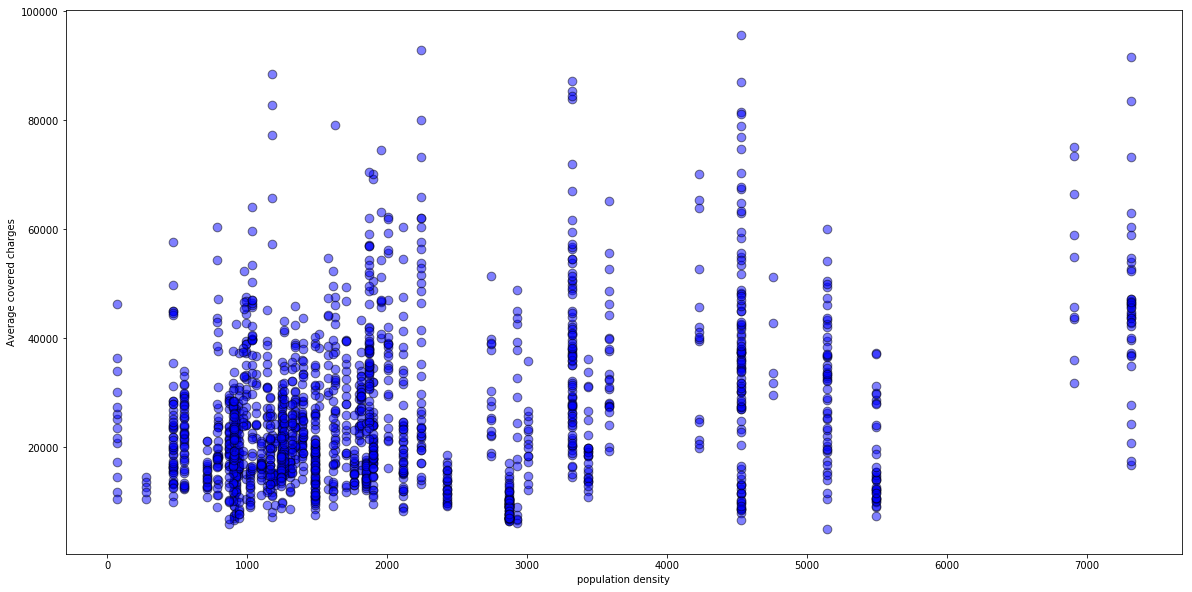

In [139]:
plt.figure(figsize=(20,10))
plt.scatter(merge_city_max["2018 Density"],merge_city_max[" Average Covered Charges "],edgecolor="black", linewidths=1, marker="o", color="blue", s=75,
           alpha=0.5 )         
plt.xlabel("population density")
plt.ylabel("Average covered charges")

Text(0,0.5,'Average Medicare Payments')

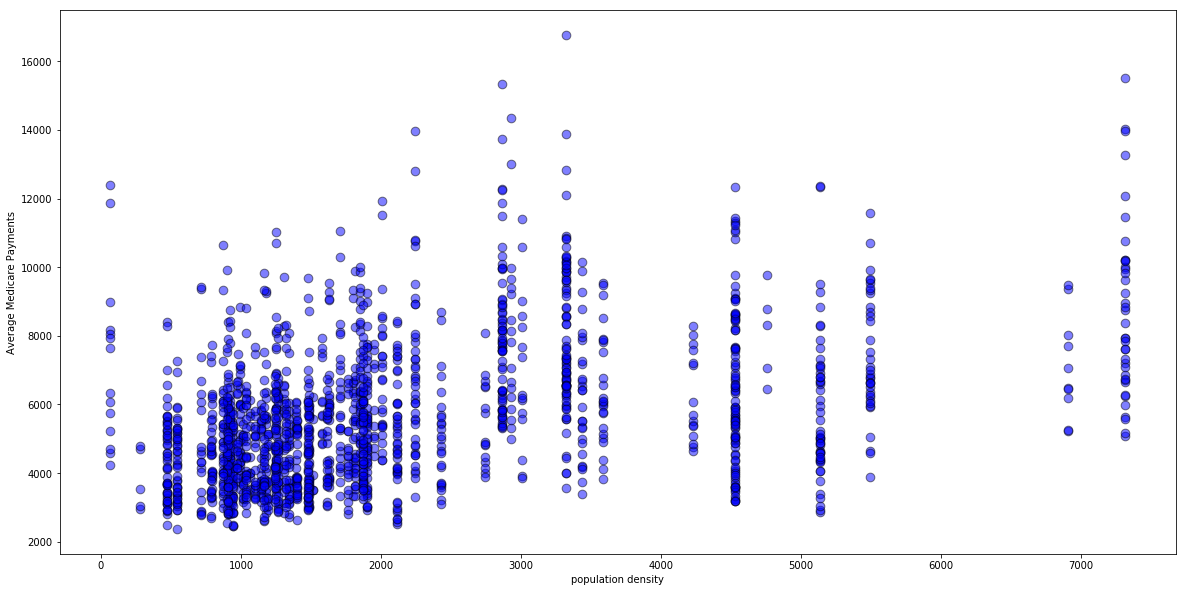

In [140]:
plt.figure(figsize=(20,10))
plt.scatter(merge_city_max["2018 Density"],merge_city_max["Average Medicare Payments"],edgecolor="black", linewidths=1, marker="o", color="blue", s=75,
           alpha=0.5 )       
plt.xlabel("population density")
plt.ylabel("Average Medicare Payments")

In [141]:
 bins = [0,1000,2000,3000,4000,5000,6000]

In [142]:
group_name= ['0-1000','1000-2000','2000-3000','3000-4000','4000-5000','5000-6000']
pd.cut(merge_city_max["2018 Density"], bins, labels=group_name)


0       5000-6000
1       5000-6000
2       5000-6000
3       5000-6000
4       5000-6000
5       5000-6000
6       5000-6000
7       5000-6000
8       5000-6000
9       5000-6000
10      5000-6000
11      5000-6000
12      5000-6000
13      5000-6000
14      5000-6000
15      5000-6000
16      5000-6000
17      5000-6000
18      5000-6000
19      5000-6000
20      5000-6000
21      5000-6000
22      5000-6000
23      5000-6000
24      5000-6000
25      5000-6000
26      5000-6000
27      5000-6000
28      5000-6000
29      5000-6000
          ...    
1735    3000-4000
1736    3000-4000
1737    3000-4000
1738    3000-4000
1739    3000-4000
1740    3000-4000
1741    3000-4000
1742    3000-4000
1743    3000-4000
1744    3000-4000
1745    1000-2000
1746    1000-2000
1747    1000-2000
1748    1000-2000
1749    1000-2000
1750    1000-2000
1751    1000-2000
1752    1000-2000
1753    1000-2000
1754    1000-2000
1755    1000-2000
1756    1000-2000
1757    1000-2000
1758    1000-2000
1759    10

In [143]:
merge_city_max["city_density_binned"]=pd.cut(merge_city_max["2018 Density"], bins, labels=group_name)

In [144]:
merge_city_max.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Rank,State,2018 Density,city_density_binned
0,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100061,MERCY HOSPITAL INC,3663 S MIAMI AVE,MIAMI,FL,33133,FL - Miami,32,33432.12,7389.15,6414.65,40,Florida,5139.267344,5000-6000
1,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100314,WEST KENDALL BAPTIST HOSPITAL,9555 SW 162 AVE,MIAMI,FL,33196,FL - Miami,13,43273.92,10551.15,4387.38,40,Florida,5139.267344,5000-6000
2,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100008,BAPTIST HOSPITAL OF MIAMI INC,8900 N KENDALL DR,MIAMI,FL,33176,FL - Miami,147,49304.62,7945.31,6605.65,40,Florida,5139.267344,5000-6000
3,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100009,UNIVERSITY OF MIAMI HOSPITAL,1400 NW 12TH AVE,MIAMI,FL,33136,FL - Miami,61,60114.81,7894.03,7139.47,40,Florida,5139.267344,5000-6000
4,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100022,JACKSON MEMORIAL HOSPITAL,1611 NW 12TH AVE,MIAMI,FL,33136,FL - Miami,114,32343.02,13100.10,12332.37,40,Florida,5139.267344,5000-6000


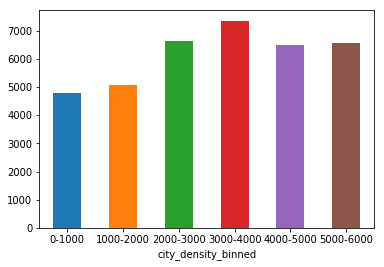

In [152]:
merge_city_max.groupby('city_density_binned')['Average Medicare Payments'].mean().plot(kind="bar", rot=0)

(array([  0.,   0.,   0.,   0.,   5.,  13.,  62., 102., 115., 123., 111.,
        106., 108.,  94., 108., 118., 102.,  84.,  72.,  52.,  46.]),
 array([1000., 1300., 1600., 1900., 2200., 2500., 2800., 3100., 3400.,
        3700., 4000., 4300., 4600., 4900., 5200., 5500., 5800., 6100.,
        6400., 6700., 7000., 7300.]),
 <a list of 21 Patch objects>)

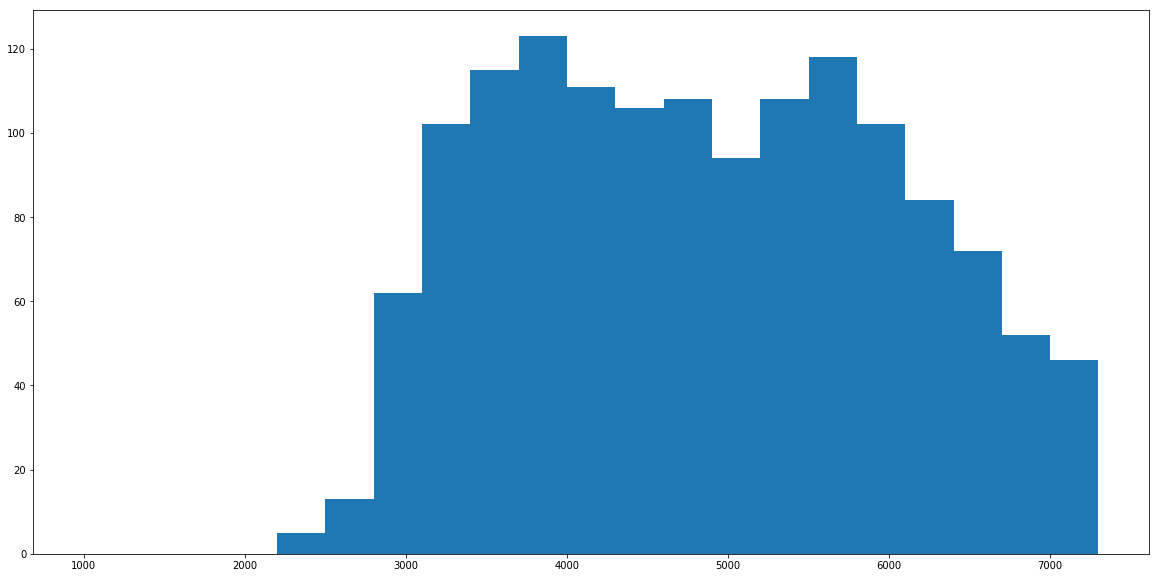

In [153]:
maxs=merge_city_max["2018 Density"].max()
bins = np.arange(1000,maxs,300)
plt.figure(figsize=(20,10))
plt.hist(merge_city_max['Average Medicare Payments'], bins=bins)